In [1]:
import sys 
sys.path.append('../') 

In [2]:
import os
import shutil
import pandas as pd

from mibi_bin_tools import bin_files
from toffy import mph_comp
from ark.utils import io_utils

### Define file parameters
 * run_name: should contain the exact name of the MIBI run to locate the mph data from
 * bin_file_path: the directory containing your bin files
 * mph_dir: the directory to save the MPH visualizations to

In [3]:
# set up directories for current run
run_name = 'YYYY-MM-DD_run_name'

bin_file_dir = os.path.join('D:\\Data', run_name)

mph_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\run_metrics', run_name)

# make mph_dir if it doesn't exist
if not os.path.exists(mph_dir):
    os.makedirs(mph_dir)

### Compute median pulse height data
The mass specifications are set to have the defaults shown below.

In [4]:
# these are the defaults for the function, user can input different values if needed
# mass = 98
# mass_start = 97.5
# mass_stop = 98.5

# retrieve all the fov names from bin_file_path
fovs = io_utils.remove_file_extensions(io_utils.list_files(bin_file_dir, substrs='.bin'))

# retrieve the total counts and compute pulse heights for each FOV run file
# saves individual .csv  files to mph_dir
for fov in fovs:
    if not os.path.exists(os.path.join(bin_file_dir, '%s-pulse_height.csv' % fov)):
        mph_comp.compute_mph_metrics(bin_file_dir, mph_dir, fov)
        
        # use the function below instead if specifying new mass integration
        #mph_comp.compute_mph_metrics(bin_file_dir, mph_dir, fov, mass, mass_start, mass_stop)

### Visualize MPH Plots

In [4]:
# prior to generating the graphs, need to combine the data for each FOV into one combined .csv
# saves directly to mph_dir
mph_comp.combine_mph_metrics(mph_dir)

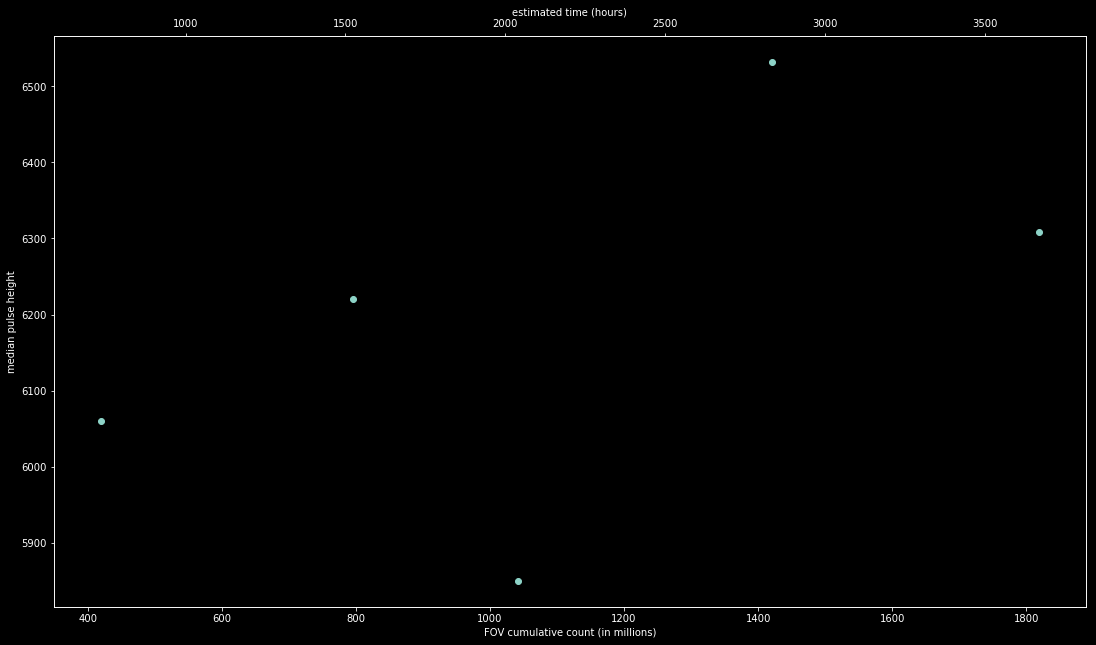

In [4]:
# visualize the median pulse heights
df_mph = pd.read_csv(os.path.join(mph_dir, 'total_count_vs_mph_data.csv'))

mph_comp.visualize_mph(df_mph, mph_dir)

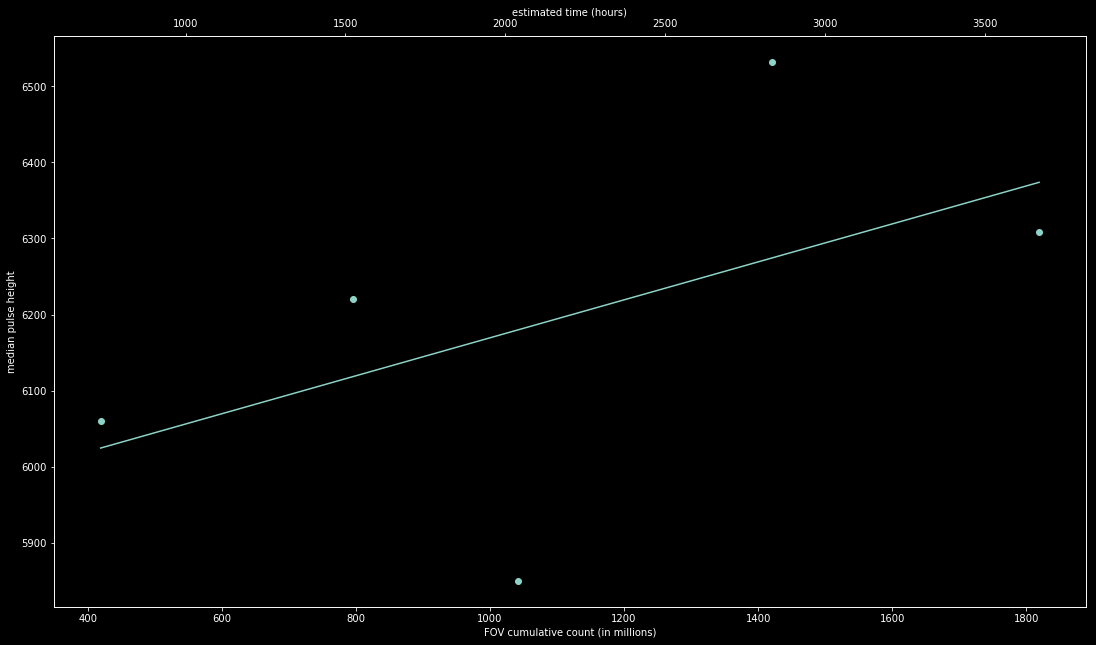

In [5]:
# plot with regression line
regression = True
mph_comp.visualize_mph(df_mph, mph_dir, regression)